# Interpolation

## Polynomiale Interpolation

Suche ein Polynom $p$ vom Grad $n$,

$$ P(x) = p_0 x^n + p_1 x^{n-1} + \ldots + p_{n-1} x + p_n, $$

dass durch die $n+1$ Punkte $(x_k,\, y_k)_{k=0}^n$ geht, d.h.

$$ P(x_k) = y_k \qquad \forall 0 \leq k \leq n. $$

Dies führt auf ein lineares Gleichungssystem $V p = y$ mit

$$ V = \begin{pmatrix}
x_0^n & x_0^{n-1} & \dots & x_0 & 1 \\
x_1^n & x_1^{n-1} & \dots & x_1 & 1 \\
\vdots & \vdots & \ddots & \vdots & \vdots \\
x_{n-1}^n & x_{n-1}^{n-1} & \dots & x_{n-1} & 1 \\
x_n^n & x_n^{n-1} & \dots & x_n & 1
\end{pmatrix},
\qquad p = \begin{pmatrix}
p_0 \\ p_1 \\ \vdots \\ p_{n-1} \\ p_n
\end{pmatrix},
\qquad y = \begin{pmatrix}
y_0 \\ y_1 \\ \vdots \\ y_{n-1} \\ y_n
\end{pmatrix}. $$

$V$ ist eine *Vandermonde-Matrix*.

```python
numpy.vander(x, m)
```
erzeugt die Vandermonde-Matrix mit `m` Spalten (d.h. mit Ordnung `n = m-1`) für die Stützstellen `x`.

#### Hinweis

Üblicherweise werden Polynome in der Form $P(x) = \sum_{k=0}^n p_k x^k$ dargestellt. In NumPy ist die Reihenfolge der Koeffizienten demgegenüber vertauscht; $p_0$ ist z.B. der Koeffizient der höchsten Potenz. `np.vander` berechnet die Vandermonde-Matrix in dieser unüblichen Reihenfolge. Will man das vermeiden, kann man `increasing=True` an `vander` übergeben.

#### Beispiel

Interpolation von $y_k = (1 + x_k^2)^{-1}$ mit `x = linspace(-5, 5, 13)`.

In [1]:
from numpy import linspace, vander
from scipy.linalg import solve

interp_x = linspace(-5, 5, 13)
interp_y = 1 / (1 + interp_x**2)

V = vander(interp_x, 13)

p = solve(V, interp_y)

## `poly1d`

```python
numpy.poly1d(coeffs)
```

nimmt eine Koeffizienten-Liste oder -Array und erzeugt ein `poly1d`-Objekt, dass das entsprechende Polynom repräsentiert. Insbesondere lässt sich dieses Objekt wie eine Funktion an beliebigen Punkten auswerten. Ausserdem sind Polynom-Multiplikation und Division möglich.

```python
numpy.poly1d(roots, True)
```
erzeugt ein Polynom, dass `roots` als Nullstellen hat.

Die Koeffizienten sind umgekehrt über das Attribut `.coeffs` verfügbar.

#### Beispiel: Plot des Interpolationspolynoms

In [1]:
# Hilfsfunktion zum Plotten

import matplotlib.pyplot as plt
plot_x = linspace(-5, 5, 150)

def plot_with_points(f, label=None):
    plt.plot(plot_x, f(plot_x), label=label)
    plt.plot(interp_x, interp_y, 'o', label='Interpolationspunkte')
    plt.grid()
    if label is not None:
        plt.legend(loc='best')

P(4.5) = -2.083395530258125


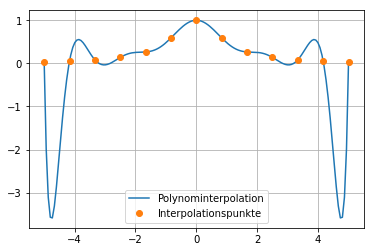

In [1]:
from numpy import poly1d

P = poly1d(p)

print('P(4.5) = {}'.format(P(4.5)))

plot_with_points(P, 'Polynominterpolation')
plt.show()

#### Beispiel: Polynomdivision

In [1]:
# Polynom mit 3 Nullstellen
P1 = poly1d([-1, 1, 2], True)

# Linearfaktor für Nullstelle 2
P2 = poly1d([1, -2])

quotient, remainder = P1 / P2

# Quotient hat Nullstellen -1 und 1
print(quotient)

# Rest ist 0
print(remainder)

   2
1 x - 1
 
0


Für komplexere Polynom-Algebra sollte man allerdings eher SymPy verwenden.

### Nullstellen berechnen

... geht mit
```python
numpy.roots(poly)
```

In [1]:
from numpy import roots

rs = roots(P)
print(rs)

[ 4.99899715+0.j          4.18053426+0.j         -4.99899715+0.j
  3.19858046+0.j          2.83327787+0.j          1.49493794+0.70726733j
  1.49493794-0.70726733j -4.18053426+0.j         -3.19858046+0.j
 -2.83327787+0.j         -1.49493794+0.70726733j -1.49493794-0.70726733j]


In [1]:
max(abs(P(rs)))

6.7679195581149543e-13

## Interpolation mit SciPy

### Polynome

Für Polynominterpolation bietet SciPy zwei verschiedene Implementierungen.

```python
scipy.interpolate.BarycentricInterpolator(x, y)
scipy.interpolate.KroghInterpolator(x, y)
```

Beide liefern ein Objekt zurück, dass sich wie eine Funktion zum auswerten an beliebigen Punkten nutzen lässt.

In [1]:
from scipy.interpolate import BarycentricInterpolator

P = BarycentricInterpolator(interp_x, interp_y)
print('P(4.5) = {}'.format(P(4.5)))

P(4.5) = -2.083395530258173


### Splines

Polynome sind zum Interpolieren oft nicht gut geeignet. Als Alternative kann man *stückweise* Polynome verwenden.

Eine Spline-Funktion der Ordnung $n$ zu den Stützstellen $(x_k, y_k)_{k=0}^{m-1}$ ist eine Funktion $f \colon [x_0,\, x_{m-1}] \to \mathbb{R}$, die folgende Bedingungen erfüllt:

- $f(x_k) = y_k$ für alle $0 \leq k \leq m-1$.
- $f$ ist $(n-1)$-mal stetig differenzierbar: $f \in C^{n-1}([x_0,\, x_{m-1}])$.
- Für jedes Teilintervall $I_k = [x_k,\, x_{k+1}]$ ($0 \leq k < m-1$) ist die Einschränkung $f|_{I_k}$ ein Polynom von Ordnung höchstens $n$.

In Python
```python
scipy.interpolate.interp1d(x, y, kind='linear')
```
Möglichkeiten für `kind`:

- `'nearest'`: *Nearest Neighbour* Interpolation (stückweise konstant, kein Spline)
- `'zero'`: Spline 0. Ordnung (stückweise konstante Splines)
- `'linear'`: Spline 1. Ordnung
- `'quadratic'`: Spline 2. Ordung
- `'cubic'`: Spline 3. Ordnung
- Ein Integer `k` legt allgemein die Spline-Ordnung fest (auch größer als 3).

Höhere Ordnungen führen nicht zwangsläufig zu besseren Ergebnissen.

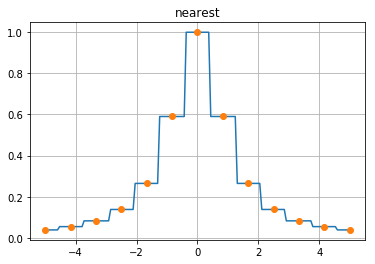

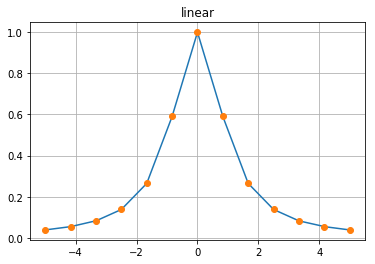

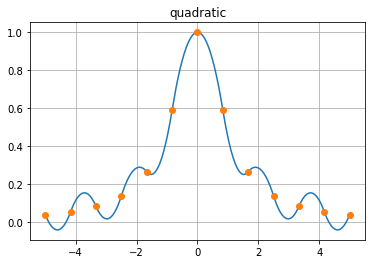

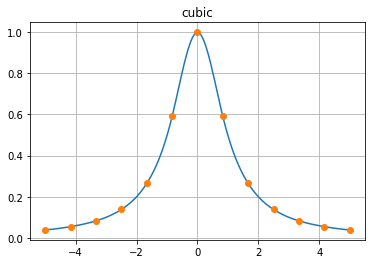

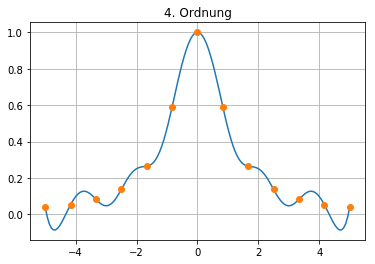

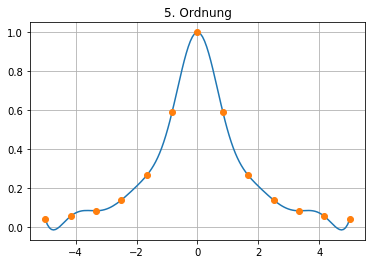

In [1]:
from scipy.interpolate import interp1d

for kind in ['nearest', 'linear', 'quadratic', 'cubic', 4, 5]:
    f = interp1d(interp_x, interp_y, kind=kind)
    plt.figure()
    plot_with_points(f)
    if isinstance(kind, int):
        plt.title('{}. Ordnung'.format(kind))
    else:
        plt.title(kind)

plt.show()

## Fitting

Bei der Polynom-Interpolation muss die Anzahl $m$ der Stützstellen übereinstimmen mit der Anzahl $n+1$ der unbekannten Koeffizienten eines Polynoms vom Grad $n$.

Oft tritt der Fall auf, dass man viele Punkte hat (möglicherweise mit Messfehlern o.ä.) und die Daten durch eine Funktion niedriger Ordnung $n < m - 1$ approxmativ beschreiben will. Statt $P(x_k) = y_k$ kann man dann z.B. ein quadratisches Ausgleichsproblem lösen und $P$ so bestimmmen, dass es

$$ \sum_{k=0}^m \left| P(x_k) - y_k \right|^2 = \left\| V p - y \right\|^2$$

unter allen Polynomen vom Grad $n$ minimiert. Hier ist $V$ die $m \times (n+1)$ Vandermonde-Matrix. Man kann zeigen, dass die Koeffizienten $p$ dann anstelle der Interpolationsgleichung $V p = y$ die *Optimalitätsbedingung*

$$ V^T V p = V^T y $$

erfüllen.

#### Beispiel: Fitting eines Polynoms vom Grad $n = 6$

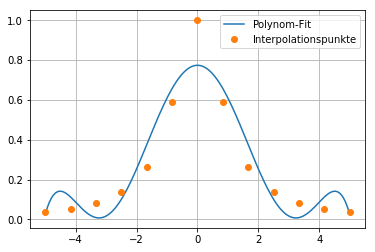

In [1]:
V = vander(interp_x, 7)
P = poly1d(solve(V.T @ V, V.T @ interp_y))

plot_with_points(P, 'Polynom-Fit')
plt.show()

### Fitting mit NumPy

Polynomielles Fitting eines Polynoms $n$-ter Ordnung geht mit

```python
numply.polyfit(x, y, n)
```

Das Resultat ist ein Koeffizienten-Array, aus dem man mit `poly1d` ein Polynom-Objekt erzeugen kann.

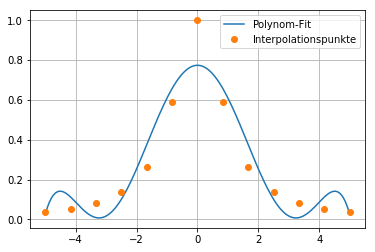

In [1]:
from numpy import polyfit

P = poly1d(polyfit(interp_x, interp_y, 6))

plot_with_points(P, 'Polynom-Fit')
plt.show()

### Fitting mit Splines

Mit Splines kann man auch Daten fitten. Dafür sucht man eine Lösung die nicht mehr exakt durch die Punkte geht, sondern nur noch im Sinne der kleinsten Quadrate optimal ist.

``` python
scipy.optimize.UnivariateSpline(x, y, s=None)
```

- `x,y`: wie gehabt die Datenpunkte die bekannt sind
- `s`: Glättungsfaktor (*smoothing factor*); steuert wieviele Punkte für die Splineinterpolation genutzt werden. 


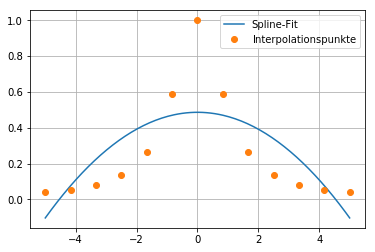

In [1]:
from scipy.interpolate import UnivariateSpline
f = UnivariateSpline(interp_x, interp_y)
plot_with_points(f, 'Spline-Fit')
plt.show()

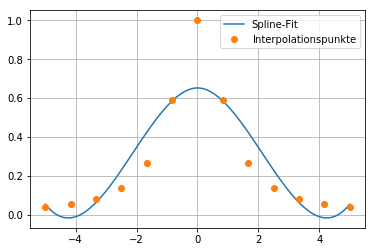

In [1]:
f = UnivariateSpline(interp_x, interp_y, s=0.2)
plot_with_points(f, 'Spline-Fit')
plt.show()

## Interpolation in 2d

### Rechteckige Gitter

```python
scipy.interpolate.interp2d(x, y, z, kind='linear')
```
bestimmt eine Funktion `f`, so dass `f(x, y) == z`. Dabei sollten die Werte auf einem rechteckigen Gitter gegeben sein. `x` und `y` können entweder nur die Achsen-Werte angeben (dann ist `x.size * y.size == z.size`) oder die kompletten Gitter (dann ist `x.size == y.size == z.size`). Im letzteren Fall muss man selbst darauf achten, dass das Gitter rechteckig ist.

`kind` kann hier die Werte `'linear'`, `'cubic'` oder `'quintic'` haben.

Der Rückgabewert ist, wie bei `interp1d`, aufrufbar wie eine Funktion.

### Unstrukturierte Punkte

```python
scipy.interpolate.griddata(points, values, xi, method='linear')
```
interpoliert von Werten, die auf einer beliebigen Menge von Punkten gegeben sind. Anders als bei `interp1d` und `interp2d` kann man die interpolierte Funktion nicht auf beliebigen Punkten auswerten. Stattdessen muss man alle Punkte, auf die man interpolieren will, beim Aufruf mit angeben.

- `points`: `(n, 2)`-Array von Punkten
- `values`: `(n,)`-Array von Funktionswerten an den Punkten
- `xi`: `(m, 2)`-Array von Punkten, auf die interpoliert werden soll
- `method`: `'nearest'`, `'linear'` oder `'cubic'`

Allgemeiner funktionieren auch Daten in `d` Dimensionen, wenn `points` und `xi` Shape `(n, d)` bzw. `(m, d)` haben.

Für die `'linear'`- und `'cubic'`-Methoden kann nur auf die *konvexe Hülle* der gegebenen `points` interpoliert werden. An anderen Punkten von `xi` wird `NaN` zurückgegeben. Für den Umgang damit kann die Funktion `numpy.isnan` nützlich sein (s.u.).

#### Hinweis zu `imshow`

`imshow` verwendet zum Anzeigen von Arrays als Bildern selbst Interpolations-Verfahren, was in den meisten auch sinnvoll ist. Zum Vergleichen der Resultate von Interpolations-Verfahren sollte man dies allerdings mit der Option
```python
interpolation='none'
```
deaktivieren.

In [1]:
from numpy import sin, cos, pi, array
from numpy.random import random
from numpy import mgrid, c_

def f(x, y):
    return cos(4*pi*x) * sin(4*pi*y)

# Sampling-Punkte

points = random((100, 2))
values = f(*points.T)

# Punkte, auf die interpoliert wird

X, Y = mgrid[0:1:50j, 0:1:50j]
xi = c_[X.ravel(), Y.ravel()]

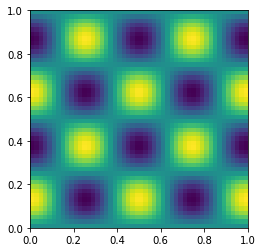

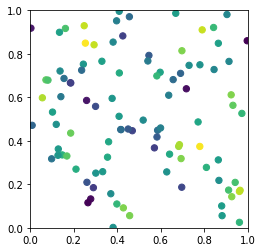

In [1]:
import matplotlib.pyplot as plt

# Zum Skalieren der Achsen von imshow
imrange = (X.min(), X.max(), Y.min(), Y.max())

plt.figure()
plt.imshow(f(X, Y).T, cmap='viridis', origin='lower', extent=imrange, interpolation='none')

plt.figure()
plt.scatter(*points.T, s=40, c=values, cmap='viridis')
plt.axis('scaled')
plt.xlim((0, 1))
plt.ylim((0, 1))

plt.show()

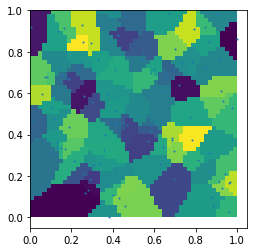

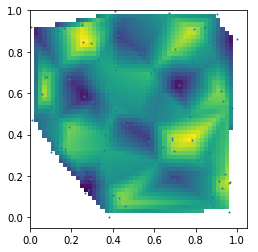

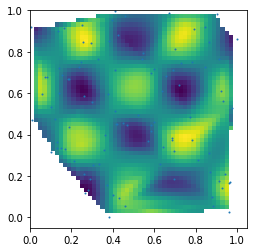

In [1]:
from scipy.interpolate import griddata

for method in ['nearest', 'linear', 'cubic']:
    p = griddata(points, values, xi, method=method)
    p = p.reshape(X.shape)

    plt.figure()
    plt.imshow(p.T, cmap='viridis', origin='lower', extent=imrange, interpolation='none')
    plt.scatter(*points.T, s=1)

plt.show()

Umgang mit `NaN`, z.B. Fortsetzen als 0 auf Aussenbereich:

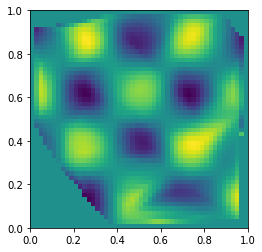

In [1]:
from numpy import isnan

p[isnan(p)] = 0
plt.imshow(p.T, cmap='viridis', origin='lower', extent=imrange, interpolation='none')
plt.show()

## Exkurs: Indizieren mit Boolschen Masken

Arrays können auch durch sogenannte **Boolsche Masken** indiziert werden, d.h. Arrays aus `True`/`False`-Werten, die dieselbe Größe haben wie das zu indizierenden Array. Das resultierende Array ist 1-dimensional und enthält nur die Werte, an der die Maske `True` ist.

Das ist besonders nützlich in Verbindung mit Vergleichsoperatoren, deren Resultat Bool-Arrays sind (s.o.).

In [1]:
from numpy import arange, array

a = arange(25).reshape((5, 5))
a % 2 == 0

array([[ True, False,  True, False,  True],
       [False,  True, False,  True, False],
       [ True, False,  True, False,  True],
       [False,  True, False,  True, False],
       [ True, False,  True, False,  True]], dtype=bool)

In [1]:
b = a[a % 2 == 0]
b

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24])

Masken können auch auf der linken Seite einer Zuweisung verwendet werden.

In [1]:
a[a % 2 == 0] = -1
a

array([[-1,  1, -1,  3, -1],
       [ 5, -1,  7, -1,  9],
       [-1, 11, -1, 13, -1],
       [15, -1, 17, -1, 19],
       [-1, 21, -1, 23, -1]])

Darüber hinaus können Masken auch nur entlang einer einzelnen Achse eingesetzt werden.

In [1]:
a = arange(25).reshape((5, 5))
mask = array([True, True, False, True, False])

a[mask, :]

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [15, 16, 17, 18, 19]])

#### Reduktionen boolscher Arrays

```python
array_object.all(axis=None)
array_object.any(axis=None)
```
`all` liefert `True`, falls *alle* Elemente entlang der jeweiligen Achse `True` sind. `any` liefert `True`, falls *mindestens ein* Element `True` ist.

Das `axis`-Argument funktioniert wie bei anderen Reduktionen (`sum`, `mean`, etc).

In [1]:
a = arange(25).reshape(5, 5)
print(a)
(a <= 2).any(axis=0)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]


array([ True,  True,  True, False, False], dtype=bool)